In [4]:
#importing necessary packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlp
from scipy.optimize import curve_fit
from  scipy.stats import chisquare
from  scipy.stats import power_divergence
from matplotlib.ticker import MultipleLocator, AutoLocator
mlp.style.use("classic") #giving a specified style to a plot

/home/mher/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in power
  


                                             
Fit Statistics                               
Fitting Method       Curve Fit   method=lmfit
Data Points                 83               
variables                   25               
Chi-square             26.0442               
Reduced Chi-square     39.4985               
                                             
Variables                Value          Error
a1                    0.624775       0.105215
tmax1                                        
rise1                  3.94673        1.26542
decay1                 5.59783        1.42042
n1                     4.56533        5.07604
a2                     1.47253       0.150464
tmax2                                        
rise2                   35.268        8.22292
decay2                 2.47718       0.408982
n2                     1.74109       0.511568
a3                     1.05248       0.102612
tmax3                                        
rise3                  7.39822    

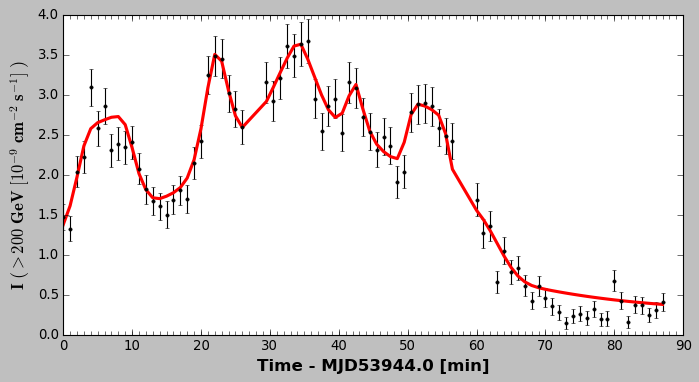

In [9]:
#reading data from a .txt file
MJD, flux, flux_err = np.loadtxt("/home/mher/Desktop/Final Results/data for PKS 2155-304.txt",unpack=True)

#changing data for adapting axis scales
flux = flux *10**9
flux_err = flux_err*10**9
MJD = (MJD - 53944.02568281) * 86400/60 #to return minutes, insted of MJDs

#definig a functions which will fit the data 

def fit(t,a1,rise1,decay1,n1,a2,rise2,decay2,n2,a3,rise3,decay3,n3,a4,rise4,
        decay4,n4,a5,rise5,decay5,n5):
    
    return 0.3+a1*np.exp(-(abs(t-6.137)/rise1)**n1)+a1*np.exp(-(abs(t-6.137)/decay1)**n1)+a2*np.exp(-(abs(t-22.2343)/rise2)**n2)+a2*np.exp(-(abs(t-22.2343)/decay2)**n2)+a3*np.exp(-(abs(t-34.1866)/rise3)**n3)+a3*np.exp(-(abs(t-34.1866)/decay3)**n3)+a4*np.exp(-(abs(t-42.329)/rise4)**n4)+a4*np.exp(-(abs(t-42.329)/decay4)**n4)+a5*np.exp(-(abs(t-52.9857)/rise5)**n5)+a5*np.exp(-(abs(t-52.9857)/decay5)**n5)



#applaying curve fiting to our data, bounds are given from infinity to infity, for returning covariance. 

optimal_param,covariance = curve_fit(fit,MJD,flux,sigma = 1/flux_err**2,p0 = [2.7,2,3,1.07,2.1,1.6,1.6,
                                                                              1.43,3.1,3.2,1.9,2,2.0,2.6,
                                                                              4,2.01,1.5,1.6,6.2,2.44],
                                    bounds=([-np.inf,-np.inf,-np.inf,-np.inf,-np.inf,-np.inf,-np.inf,-np.inf,-np.inf,-np.inf,-np.inf,-np.inf,-np.inf,
        -np.inf,-np.inf,-np.inf,-np.inf,-np.inf,-np.inf,-np.inf],[np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,
        np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,np.inf]))


  
#compute chi-sqaures, and reduced chi sqaured, for detecting goodness of fit

yfunc_chi = fit(flux,*optimal_param)
chi_list = [(flux[i]-yfunc_chi[i])**2/flux_err[i]**2 for i in range(0,len(MJD))]
chi_sum = sum(chi_list) 
#chi square
chi_square = power_divergence(flux,yfunc_chi,ddof=82, lambda_='pearson')[0] #ddof is the numbers of data point -1

#reduced-chi square 
re_chi = chi_sum/(len(MJD)-1) #for getting reduced chi square we devide chi sum to freedom degree, which is #of data poins -1

#Creating DatFrame object to visualize fit report.
columns = ["Fitting Method","Data Points","variables","Chi-square","Reduced Chi-square"," ","Variables", "a1","tmax1","rise1", "decay1", "n1",'a2','tmax2','rise2','decay2','n2',
           'a3','tmax3','rise3','decay3','n3','a4','tmax4','rise4','decay4','n4','a5','tmax5',
           'rise5','decay5','n5']

#optimization is a dictionary with keys of fit report variable names, and values, of fit corresponind values
optimization ={
      "Fitting Method":[" Curve Fit"," method=lmfit"],
      "Data Points":[len(MJD)," "],
      "variables": [25," "],
      "Chi-square":[chi_square," "],
      "Reduced Chi-square": [re_chi, " "],
      " ": [" "," "],
      "Variables": ["Value","Error"],
      "a1" : [optimal_param[0], covariance[0,0]**0.5],
      "tmax1": [" "],
      "rise1": [optimal_param[1],covariance[1,1]**0.5],
      "decay1": [optimal_param[2],covariance[2,2]**0.5 ],
      "n1": [optimal_param[3],covariance[3,3]**0.5],
      'a2': [optimal_param[4],covariance[4,4]**0.5],
      'tmax2': [' '],
      'rise2': [optimal_param[5],covariance[5,5]**0.5],
      'decay2': [optimal_param[6],covariance[6,6]**0.5],
      'n2': [optimal_param[7],covariance[7,7]**0.5],
      'a3':[optimal_param[8],covariance[8,8]**0.5],
      'tmax3':[' '],
      'rise3': [optimal_param[9],covariance[9,9]**0.5],
      'decay3': [optimal_param[10],covariance[10,10]**0.5],
      'n3': [optimal_param[11],covariance[11,11]**0.5],
      'a4':[optimal_param[12],covariance[12,12]**0.5],
      'tmax4': [' '],
      'rise4':[optimal_param[13],covariance[13,13]**0.5],
      'decay4': [optimal_param[14],covariance[14,14]**0.5],
      'n4':[optimal_param[15],covariance[15,15]**0.5],
      'a5': [optimal_param[16],covariance[16,16]**0.5],
      'tmax5': [' '],
      'rise5':[optimal_param[17],covariance[17,17]**0.5],
      'decay5':[optimal_param[18],covariance[18,18]**0.5],
      'n5': [optimal_param[19],covariance[19,19]**0.5],
       }


df = pd.DataFrame(data = optimization, columns=columns, index=[" "," "]) #creating a dataframe
report = df.T #transposing it for better visualization
report.index.name = "Fit Statistics" 

print(report)

#plotting

fig, ax = plt.subplots(figsize = (10,5)) #configuring figure size
#creating error graph of our data 
plt.errorbar(MJD,flux, yerr =flux_err, fmt = ".-", ecolor="k", elinewidth=1.002,ls = ":", lw = 0, color= "k", capsize=1.98)
#add fitting plot
plt.plot(MJD,fit(MJD,*optimal_param),color ="r", linewidth = 2.8)


# configuring y axis
plt.ylim(0,4)
ytext = r'$ \mathbf {I\ \left(>200\ GeV\ [10^{-9}\ cm^{-2}\ s^{-1} ]\ \right)} $'
plt.ylabel(ytext, fontweight = "bold", fontsize = 15)

#configuring  x axis

xtext = "Time - MJD53944.0 [min]"
plt.xlabel(xtext, fontsize = 15, fontweight = "bold")

#configuring ticks

xminorlocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(xminorlocator)
ax.tick_params(which = "major",length = 5.7 )
ax.tick_params(which = "minor", length = 3.9)

#saving and showing graph

#plt.savefig("/home/mher/Desktop/PKS2155-304, integral flux, fitting/Plots/Integral Flux PKS2155-304, curve_fit, best,better.pdf", dpi = 400)
plt.show()



